In [21]:
import pandas as pd
data=pd.read_csv('../data/Table1_new.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_Citations']/data['age']
data.head(3)

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,read_length,max_read_length_tested,Title,Number_of_Citations,Indexing,...,fix length seed,Variable length seed (hybrid seeding),spaced seed,chain_of_seeds,Application,email - first author,email - last author,Verified,age,citation_per_year
0,43.0,2011,Bismark,https://www.bioinformatics.babraham.ac.uk/proj...,Krueger et al. ‎2011,Ultra-short,50,Bismark: a flexible aligner and methylation ca...,1550,BWT-FM,...,Y,N,N,N,BS-Seq,felix.krueger@bbsrc.ac.uk,NaN,NaN,9,172.222222
1,16.0,2009,BRAT,http://compbio.cs.ucr.edu/brat/,Harris et al. 2009,Ultra-short,26,BRAT: bisulfite-treated reads analysis tool,64,Hashing,...,Y,N,N,N,BS-Seq,elenah@cs.ucr.edu,stefano.lonardi@ucr.edu,NaN,11,5.818182
2,54.0,2012,BRAT-BW,http://compbio.cs.ucr.edu/brat/,Harris et al. 2012,Ultra-short,62,BRAT-BW: efficient and accurate mapping of bis...,70,BWT-FM,...,N,Y,N,N,BS-Seq,elenayharris@gmail.com,stefano.lonardi@ucr.edu,NaN,8,8.750000


In [22]:
rt = pd.read_csv('../data/compare.tools.runtime.hours.csv')
idx_rt = pd.read_csv('../data/compare.tools.index.csv')
mem = pd.read_csv('../data/compare.tools.memory.csv')

In [23]:
data_year = data.loc[:,['Year_of_publication', 'Aligner', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2']]
data_year.loc[:,'aligner_lower'] = data_year['Aligner'].str.lower()
rt.loc[:,'tools_lower'] = rt['Tools'].str.lower()
rtyear = pd.merge(rt, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtyear.loc[:,'average_runtime'] = rtyear.iloc[:,1:11].mean(axis=1)
rtyear_summ = rtyear.loc[:,['Tools', 'Year_of_publication', 'average_runtime', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2']]
rtyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,16):
    rtyear.loc[i,'year_split'] = 'Before 2012' if rtyear.loc[i,'Year_of_publication'] < 2012 else '2012 and later'
rtyear_new = pd.melt(rtyear, id_vars = ['Tools', 'year_split', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
rtyear_summ


,Tools,Year_of_publication,average_runtime,Application,Indexing,Global_Positioning,Pairwise_alignment_2
9,rmap,2008,12.950420,DNA,Hashing,Seed,Hamming Distance
1,Bowtie,2009,6.102213,DNA,BWT-FM,Backward Search,Hamming Distance
2,BWA,2009,6.239311,DNA,BWT-FM,Backward Search,Local
4,gsnap,2010,20.924469,DNA,Hashing,Seed,Non-DP Heuristic
10,smalt,2010,32.163790,DNA,Hashing,Seed,Local
6,last,2011,20.221401,DNA,Suffix Array,Seed,Local
11,snap,2011,1.165595,DNA,Hashing,Seed,Global
12,soapsplice,2011,19.710631,RNA-Seq,BWT-FM,Seed,Non-DP Heuristic
0,Bowtie2,2012,4.973138,DNA,BWT-FM,Backward Search,Local & Global
13,STAR,2013,1.044570,RNA-Seq,Suffix Array,Seed,Local


In [24]:
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memyear = pd.merge(mem, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
memyear.loc[:,'average_memory'] = memyear.iloc[:,1:11].mean(axis=1)
memyear_summ = memyear.loc[:,['Tools', 'Year_of_publication', 'average_memory', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2']]
memyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,16):
    memyear.loc[i,'year_split'] = 'Before 2012' if memyear.loc[i,'Year_of_publication'] < 2012 else '2012 and later'
memyear_new = pd.melt(memyear, id_vars = ['Tools', 'year_split', 'Application', 'Indexing', 'Global_Positioning', 'Pairwise_alignment_2'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memyear_summ

,Tools,Year_of_publication,average_memory,Application,Indexing,Global_Positioning,Pairwise_alignment_2
9,rmap,2008,9.5320,DNA,Hashing,Seed,Hamming Distance
1,Bowtie,2009,3.1940,DNA,BWT-FM,Backward Search,Hamming Distance
2,BWA,2009,5.7110,DNA,BWT-FM,Backward Search,Local
4,gsnap,2010,28.8536,DNA,Hashing,Seed,Non-DP Heuristic
10,smalt,2010,3.6766,DNA,Hashing,Seed,Local
6,last,2011,15.3589,DNA,Suffix Array,Seed,Local
11,snap,2011,36.1000,DNA,Hashing,Seed,Global
12,soapsplice,2011,6.0050,RNA-Seq,BWT-FM,Seed,Non-DP Heuristic
0,Bowtie2,2012,3.5799,DNA,BWT-FM,Backward Search,Local & Global
13,STAR,2013,27.2497,RNA-Seq,Suffix Array,Seed,Local


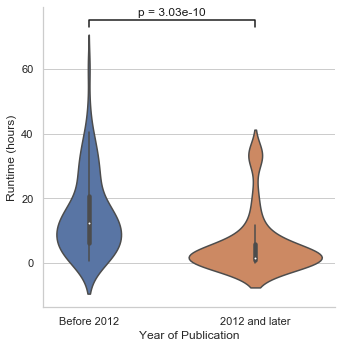

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp

mwu = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['year_split'] == 'Before 2012'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['year_split'] == '2012 and later'].loc[:,'runtime'],
                             alternative = 'greater')

sns.set(style='whitegrid')
ax = sns.catplot(data = rtyear_new, x = 'year_split', y = 'runtime', kind = 'violin', 
                 order = ['Before 2012', '2012 and later'])
ax.set(xlabel = 'Year of Publication', ylabel = 'Runtime (hours)')
plt.plot([0,0,1,1], [73,75,75,73], lw = 1.5, c = 'k')
plt.text(.5, 76, 'p = ' + "{0:.2e}".format(mwu.pvalue), ha = 'center', va = 'bottom', color = 'k')
plt.show()
#plt.savefig('../figures/Runtime_by_YoP.png')



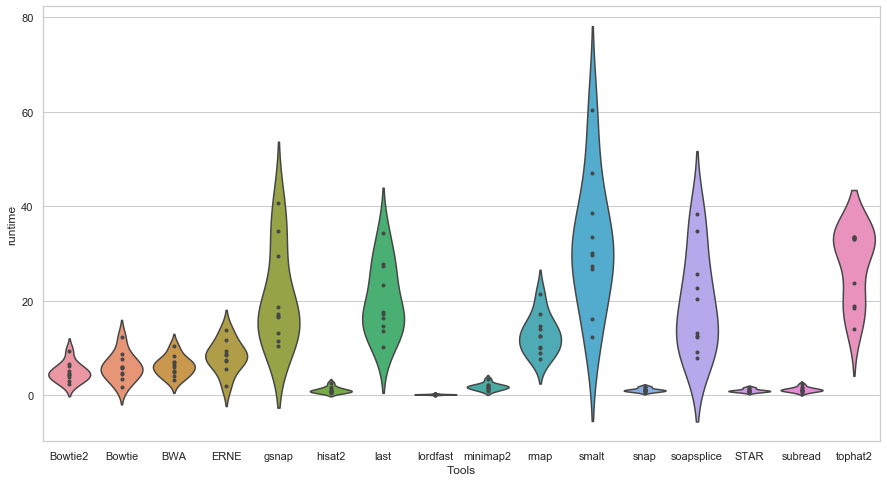

In [26]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(data = rtyear_new, x = 'Tools', y = 'runtime', scale='width', inner='points')
plt.show()

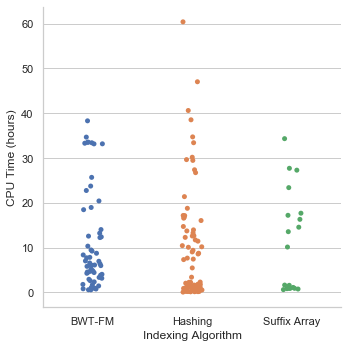

In [27]:
mwu = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Indexing'] == 'Hashing'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Indexing'] == 'BWT-FM'].loc[:,'runtime'],
                             alternative = 'two-sided')

ax = sns.catplot(data = rtyear_new, x = 'Indexing', y = 'runtime')
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'CPU Time (hours)')
plt.show()

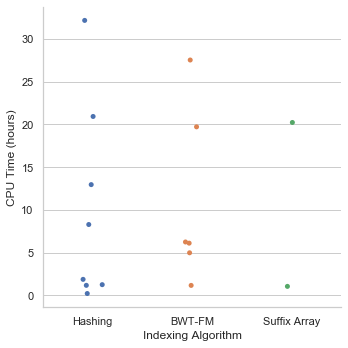

In [28]:
ax = sns.catplot(data = rtyear_summ, x = 'Indexing', y = 'average_runtime')
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'CPU Time (hours)')
plt.show()

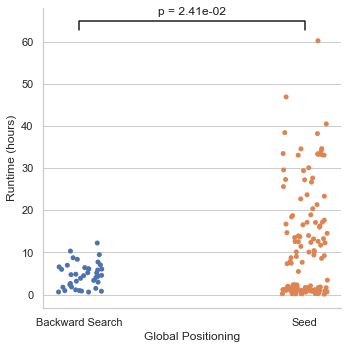

In [29]:
mwu = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Global_Positioning'] == 'Backward Search'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Global_Positioning'] == 'Seed'].loc[:,'runtime'],
                             alternative = 'two-sided')

ax = sns.catplot(data = rtyear_new, x = 'Global_Positioning', y = 'runtime')
ax.set(xlabel = 'Global Positioning', ylabel = 'Runtime (hours)')
plt.plot([0,0,1,1], [63,65,65,63], lw = 1.5, c = 'k')
plt.text(.5, 66, 'p = ' + "{0:.2e}".format(mwu.pvalue), ha = 'center', va = 'bottom', color = 'k')
plt.show()

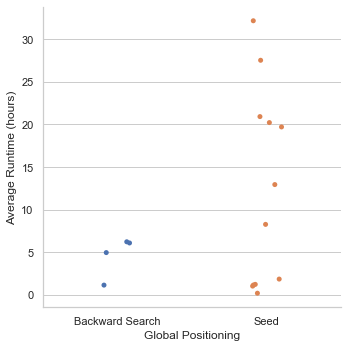

In [30]:
ax = sns.catplot(data = rtyear_summ, x = 'Global_Positioning', y = 'average_runtime', 
                 order=['Backward Search', 'Seed'])
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Runtime (hours)')
plt.show()

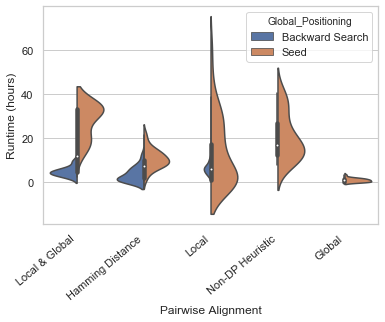

In [31]:
mwu1 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Local & Global'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Hamming Distance'].loc[:,'runtime'],
                             alternative = 'greater')
mwu2 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Hamming Distance'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Local'].loc[:,'runtime'],
                             alternative = 'less')
mwu3 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Local'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Non-DP Heuristic'].loc[:,'runtime'],
                             alternative = 'less')
mwu4 = scp.stats.mannwhitneyu(rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Non-DP Heuristic'].loc[:,'runtime'], 
                              rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Global'].loc[:,'runtime'],
                             alternative = 'greater')

ax = sns.violinplot(data = rtyear_new, x = 'Pairwise_alignment_2', y = 'runtime', hue = 'Global_Positioning', 
                    split=True, scale='count')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Runtime (hours)')
#ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right", labels=["Local & Global", "Hamming Distance", "Local", 
                                                    "Non-DP Heuristic", "Global"])
#plt.plot([0,0,1,1], [58,60,60,58], lw = 1.5, c = 'k')
#plt.text(.5, 61, 'p = ' + "{0:.2e}".format(mwu1.pvalue), ha = 'center', va = 'bottom', color = 'k')
#plt.plot([1,1,2,2], [65,67,67,65], lw = 1.5, c = 'k')
#plt.text(1.5, 68, 'p = ' + "{0:.2e}".format(mwu2.pvalue), ha = 'center', va = 'bottom', color = 'k')
#plt.plot([2,2,3,3], [72,74,74,72], lw = 1.5, c = 'k')
#plt.text(2.5, 75, 'p = ' + "{0:.2e}".format(mwu3.pvalue), ha = 'center', va = 'bottom', color = 'k')
#plt.plot([3,3,4,4], [65,67,67,65], lw = 1.5, c = 'k')
#plt.text(3.5, 68, 'p = ' + "{0:.2e}".format(mwu4.pvalue), ha = 'center', va = 'bottom', color = 'k')
plt.show()

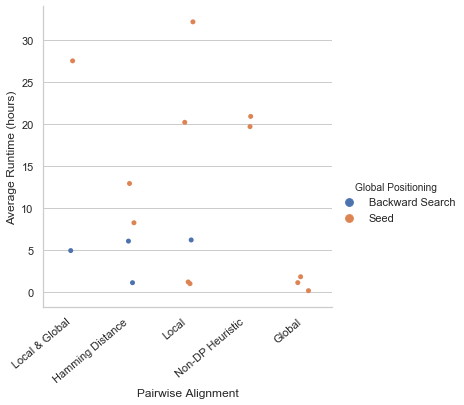

In [32]:
ax = sns.catplot(data = rtyear_summ, x = 'Pairwise_alignment_2', y = 'average_runtime', hue = 'Global_Positioning',
                hue_order=['Backward Search', 'Seed'],
                order=['Local & Global', 'Hamming Distance', 'Local', 'Non-DP Heuristic', 'Global'])
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Average Runtime (hours)')
ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right")
plt.show()

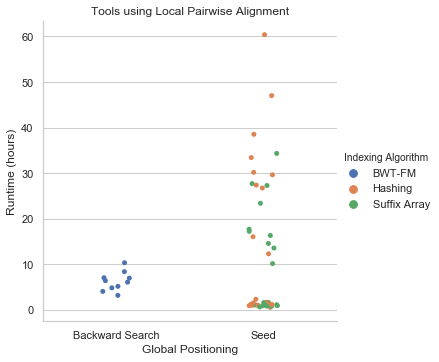

In [33]:
ax = sns.catplot(data = rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Local'], x = 'Global_Positioning', 
                y = 'runtime', hue = 'Indexing', hue_order=['BWT-FM', 'Hashing', 'Suffix Array'])
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Runtime (hours)', title = 'Tools using Local Pairwise Alignment')

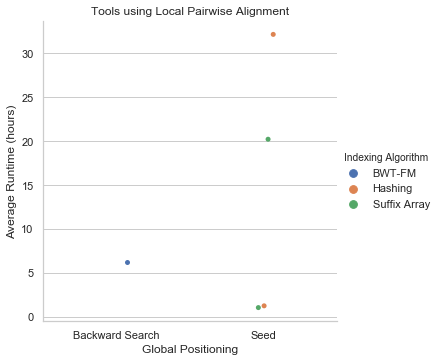

In [34]:
ax = sns.catplot(data = rtyear_summ.loc[rtyear_summ['Pairwise_alignment_2'] == 'Local'], x = 'Global_Positioning', 
                y = 'average_runtime', hue = 'Indexing', hue_order=['BWT-FM', 'Hashing', 'Suffix Array'])
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Runtime (hours)', title = 'Tools using Local Pairwise Alignment')

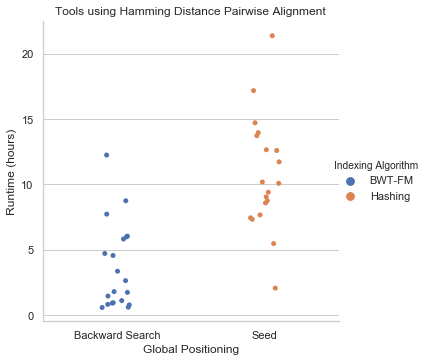

In [35]:
ax = sns.catplot(data = rtyear_new.loc[rtyear_new['Pairwise_alignment_2'] == 'Hamming Distance'],
                 x = 'Global_Positioning', y = 'runtime', hue = 'Indexing')
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Runtime (hours)', title = 'Tools using Hamming Distance Pairwise Alignment')

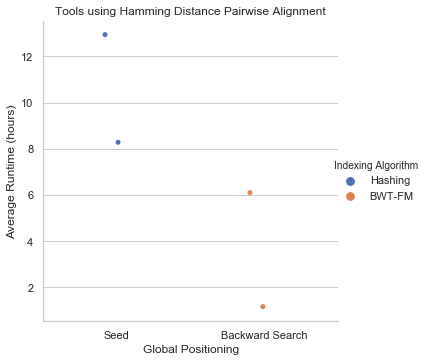

In [36]:
ax = sns.catplot(data = rtyear_summ.loc[rtyear_summ['Pairwise_alignment_2'] == 'Hamming Distance'],
                 x = 'Global_Positioning', y = 'average_runtime', hue = 'Indexing')
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Average Runtime (hours)', title = 'Tools using Hamming Distance Pairwise Alignment')

In [37]:
test = rtyear_new.groupby(['Global_Positioning','Pairwise_alignment_2']).mean()
#test = rtyear_new.pivot(index = 'global_alignment_algorithm', columns = 'local', values = 'runtime')
test = test.unstack(level = -1)
test

runtime                                             \
Pairwise_alignment_2    Global Hamming Distance      Local Local & Global   
Global_Positioning                                                          
Backward Search            NaN         3.630463   6.239311       4.973137   
Seed                  1.080196        10.739059  13.668802      27.529830   

                                       
Pairwise_alignment_2 Non-DP Heuristic  
Global_Positioning                     
Backward Search                   NaN  
Seed                         20.31755

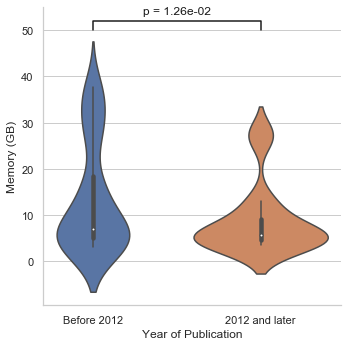

In [38]:
mwu = scp.stats.mannwhitneyu(memyear_new.loc[rtyear_new['year_split'] == 'Before 2012'].loc[:,'memory'], 
                              memyear_new.loc[rtyear_new['year_split'] == '2012 and later'].loc[:,'memory'],
                             alternative = 'greater')

ax = sns.catplot(data = memyear_new, x = 'year_split', y = 'memory', kind = 'violin', 
                 order = ['Before 2012', '2012 and later'])
ax.set(xlabel = 'Year of Publication', ylabel = 'Memory (GB)')
plt.plot([0,0,1,1], [50,52,52,50], lw = 1.5, c = 'k')
plt.text(.5, 53, 'p = ' + "{0:.2e}".format(mwu.pvalue), ha = 'center', va = 'bottom', color = 'k')
plt.show()

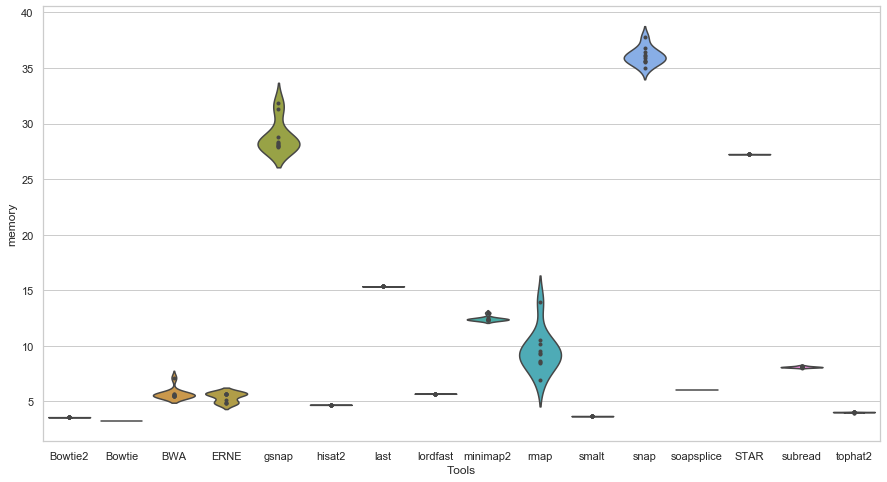

In [40]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(data = memyear_new, x = 'Tools', y = 'memory', scale='width', inner='points')
plt.show()

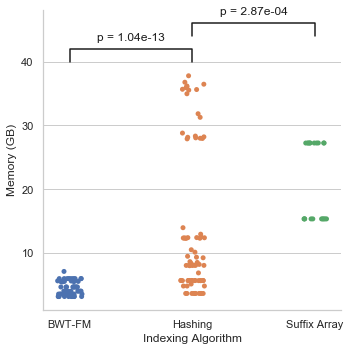

In [43]:
mwu1 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'Hashing'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'Suffix Array'].loc[:,'memory'],
                             alternative = 'less')

mwu2 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'BWT-FM'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'Hashing'].loc[:,'memory'],
                             alternative = 'less')

ax = sns.catplot(data = memyear_new, x = 'Indexing', y = 'memory')
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Memory (GB)')

plt.plot([0,0,1,1], [40,42,42,40], lw = 1.5, c = 'k')
plt.text(.5, 43, 'p = ' + "{0:.2e}".format(mwu2.pvalue), ha = 'center', va = 'bottom', color = 'k')
plt.plot([1,1,2,2], [44,46,46,44], lw = 1.5, c = 'k')
plt.text(1.5, 47, 'p = ' + "{0:.2e}".format(mwu1.pvalue), ha = 'center', va = 'bottom', color = 'k')

plt.show()

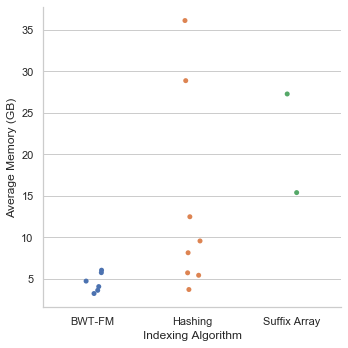

In [45]:
ax = sns.catplot(data = memyear_summ, x = 'Indexing', y = 'average_memory', 
                 order=['BWT-FM', 'Hashing', 'Suffix Array'])
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Average Memory (GB)')
plt.show()

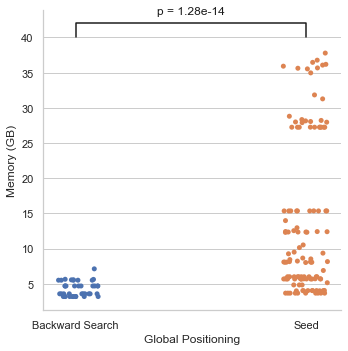

In [46]:
mwu = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Global_Positioning'] == 'Backward Search'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Global_Positioning'] == 'Seed'].loc[:,'memory'],
                             alternative = 'less')

ax = sns.catplot(data = memyear_new, x = 'Global_Positioning', y = 'memory')
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)')
plt.plot([0,0,1,1], [40,42,42,40], lw = 1.5, c = 'k')
plt.text(.5, 43, 'p = ' + "{0:.2e}".format(mwu.pvalue), ha = 'center', va = 'bottom', color = 'k')
plt.show()

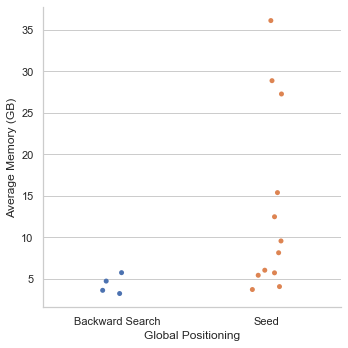

In [48]:
ax = sns.catplot(data = memyear_summ, x = 'Global_Positioning', y = 'average_memory', order=['Backward Search', 'Seed'])
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)')
plt.show()

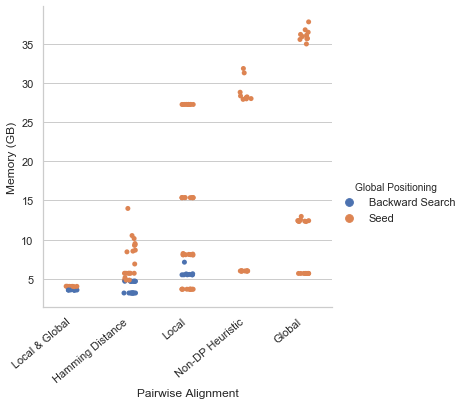

In [49]:
ax = sns.catplot(data = memyear_new, x = 'Pairwise_alignment_2', y = 'memory', hue = 'Global_Positioning')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Memory (GB)')
ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right")
plt.show()

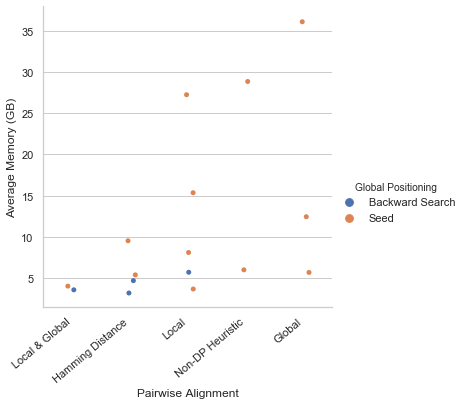

In [51]:
ax = sns.catplot(data = memyear_summ, x = 'Pairwise_alignment_2', y = 'average_memory', hue = 'Global_Positioning',
                hue_order=['Backward Search', 'Seed'], 
                 order=['Local & Global', 'Hamming Distance', 'Local', 'Non-DP Heuristic', 'Global'])
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Average Memory (GB)')
ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right")
plt.show()

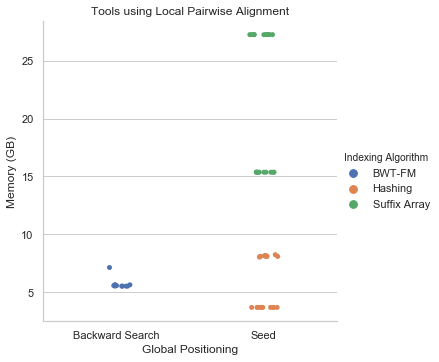

In [55]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment_2'] == 'Local'], x = 'Global_Positioning', 
                y = 'memory', hue = 'Indexing', hue_order=['BWT-FM', 'Hashing', 'Suffix Array'])
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Local Pairwise Alignment')

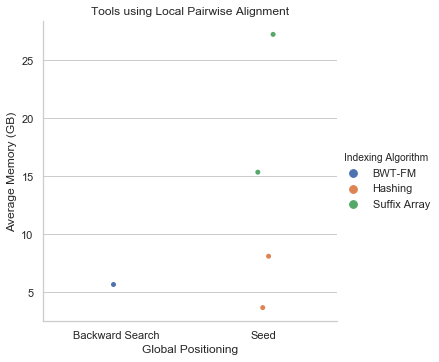

In [54]:
ax = sns.catplot(data = memyear_summ.loc[memyear_summ['Pairwise_alignment_2'] == 'Local'], x = 'Global_Positioning', 
                y = 'average_memory', hue = 'Indexing')
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)', title = 'Tools using Local Pairwise Alignment')

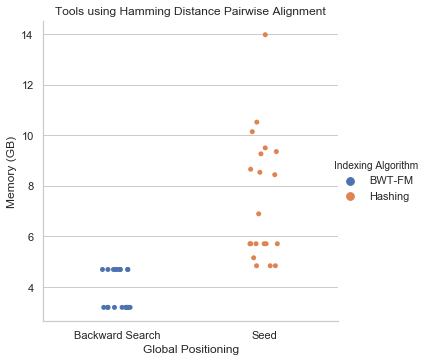

In [56]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment_2'] == 'Hamming Distance'],
                 x = 'Global_Positioning', y = 'memory', hue = 'Indexing')
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Hamming Distance Pairwise Alignment')


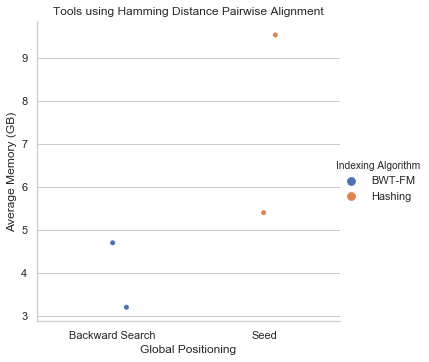

In [59]:
ax = sns.catplot(data = memyear_summ.loc[memyear_summ['Pairwise_alignment_2'] == 'Hamming Distance'],
                 x = 'Global_Positioning', y = 'average_memory', hue = 'Indexing', hue_order=['BWT-FM','Hashing'],
                order=['Backward Search', 'Seed'])
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)', title = 'Tools using Hamming Distance Pairwise Alignment')


In [60]:
test = memyear_new.groupby(['Global_Positioning','Pairwise_alignment_2']).mean()
#test = rtyear_new.pivot(index = 'global_alignment_algorithm', columns = 'local', values = 'runtime')
test = test.unstack(level = -1)
test

memory                                           \
Pairwise_alignment_2   Global Hamming Distance    Local Local & Global   
Global_Positioning                                                       
Backward Search           NaN          3.94405   5.7110         3.5799   
Seed                  18.0795          7.46355  13.5985         4.0304   

                                       
Pairwise_alignment_2 Non-DP Heuristic  
Global_Positioning                     
Backward Search                   NaN  
Seed                          17.4293

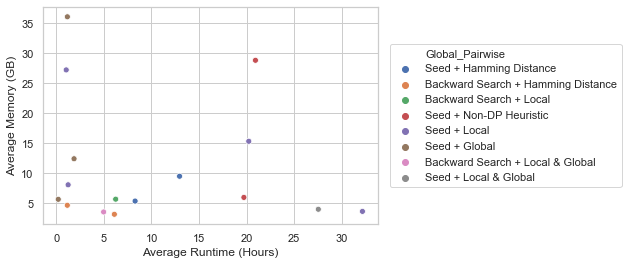

In [82]:
#rtyear_summ.head()
#memyear_summ.head()
rtvm = pd.merge(rtyear_summ, memyear_summ, 
                on=['Tools','Year_of_publication','Application','Indexing','Global_Positioning','Pairwise_alignment_2'],
                how='inner')
rtvm.loc[:,'Global_Pairwise'] = rtvm.loc[:,'Global_Positioning'] + " + " + rtvm.loc[:,'Pairwise_alignment_2']
#rtvm
ax = sns.scatterplot(data=rtvm, x = 'average_runtime', y = 'average_memory', hue = 'Global_Pairwise')
ax.set(xlabel='Average Runtime (Hours)', ylabel='Average Memory (GB)')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
plt.show()


In [61]:
data_index = data[['Aligner', 'Indexing']]
data_index.loc[:,'aligner_lower'] = data_index.loc[:,'Aligner'].str.lower()
idx_rt.loc[:,'tools_lower'] = idx_rt.loc[:,'Tools'].str.lower()
rtidx = pd.merge(idx_rt, data_index, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtidx = rtidx.dropna()
t = pd.DatetimeIndex(rtidx.loc[:,'Runtime'])
rtidx.loc[:,'Runtime (minutes)'] = t.hour*60 + t.minute
rtidx

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Tools,Runtime,Virtual Mem (G),tools_lower,Aligner,Indexing,aligner_lower,Runtime (minutes)
0,bowtie2,1:53:39,5.398,bowtie2,Bowtie2,BWT-FM,bowtie2,113
1,bowtie,1:42:21,5.395,bowtie,Bowtie,BWT-FM,bowtie,102
2,bwa,1:10:43,4.448,bwa,BWA,BWT-FM,bwa,70
3,erne,6:52:25,12.956,erne,ERNE,Hashing,erne,412
4,gsnap,1:08:32,19.561,gsnap,GSNAP,Hashing,gsnap,68
5,hisat2,1:07:14,5.394,hisat2,HISAT2,BWT-FM,hisat2,67
6,last,0:55:16,28.148,last,LAST,Suffix Array,last,55
7,lordfast,1:04:37,5.423,lordfast,lordFAST,Hashing,lordfast,64
8,MOSAIK,0:01:09,6.688,mosaik,MOSAIK,Hashing,mosaik,1
9,segemehl,1:26:45,57.773,segemehl,segemehl,Suffix Array,segemehl,86


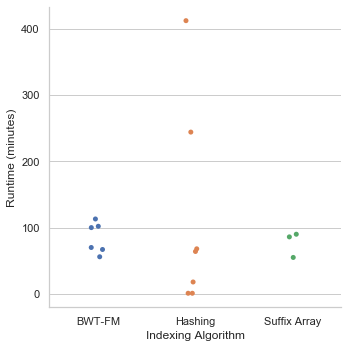

In [62]:
ax = sns.catplot(data = rtidx, x = 'Indexing', y = 'Runtime (minutes)')
ax.set(xlabel = 'Indexing Algorithm')
plt.savefig('../figures/Indexing_by_time.png')

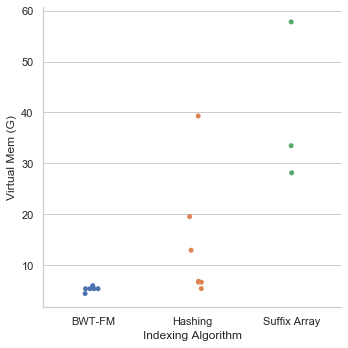

In [72]:
ax = sns.catplot(data = rtidx, x = 'Indexing', y = 'Virtual Mem (G)')
ax.set(xlabel = 'Indexing Algorithm')
plt.savefig('../figures/Indexing_by_mem.png')

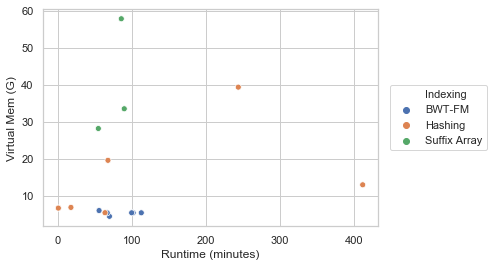

In [83]:
ax = sns.scatterplot(data=rtidx, x = 'Runtime (minutes)', y = 'Virtual Mem (G)', 
                    hue = 'Indexing')
ax.set(xlabel = 'Runtime (minutes)')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)
plt.savefig('../figures/Indexing_mem_vs_runtime.png')
#plt.show()

In [ ]:
tools = data.loc[:,['Aligner','Indexing','Global_Positioning','Pairwise_alignment_2',
                   'Pairwise_alignment (DP-based?)','fix length seed','Variable length seed (hybrid seeding)',
                   'spaced seed','chain_of_seeds']]
tools.head()

In [ ]:
tools.loc[:,'aligner_lower'] = data_year['Aligner'].str.lower()
seed_info = pd.merge(rtyear, tools, left_on='tools_lower', right_on='aligner_lower', how='inner')
seed_info = seed_info.loc[:,['Tools','ERR009309','ERR013127','ERR013138','ERR045708','ERR050158','ERR162843',
                             'ERR181410','ERR183377','SRR061640','SRR360549','Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds']]
seed_info

In [ ]:
seed_all = pd.melt(seed_info, id_vars = ['Tools', 'Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
seed_all.head()

In [ ]:
ax = sns.catplot(data = seed_all, x = 'Pairwise_alignment (DP-based?)', y = 'runtime')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Runtime (hours)')
plt.show()

In [ ]:
ax = sns.catplot(data = seed_all, x = 'fix length seed', y = 'runtime')
ax.set(xlabel = 'Fixed Length Seed', ylabel = 'Runtime (hours)')
plt.show()

In [ ]:
ax = sns.catplot(data = seed_all, x = 'Variable length seed (hybrid seeding)', y = 'runtime')
ax.set(xlabel = 'Hybrid Seeding', ylabel = 'Runtime (hours)')
plt.show()

In [ ]:
ax = sns.catplot(data = seed_all, x = 'spaced seed', y = 'runtime')
ax.set(xlabel = 'Spaced Seed', ylabel = 'Runtime (hours)')
plt.show()

In [ ]:
ax = sns.catplot(data = seed_all, x = 'chain_of_seeds', y = 'runtime')
ax.set(xlabel = 'Chain of Seeds', ylabel = 'Runtime (hours)')
plt.show()

In [ ]:
seed_mem = pd.merge(memyear, tools, left_on='tools_lower', right_on='aligner_lower', how='inner')
seed_mem = seed_info.loc[:,['Tools','ERR009309','ERR013127','ERR013138','ERR045708','ERR050158','ERR162843',
                             'ERR181410','ERR183377','SRR061640','SRR360549','Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds']]
seed_mem

In [ ]:
mem_all = pd.melt(seed_mem, id_vars = ['Tools', 'Pairwise_alignment (DP-based?)',
                             'fix length seed','Variable length seed (hybrid seeding)',
                             'spaced seed','chain_of_seeds'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
mem_all.head()

In [ ]:
ax = sns.catplot(data = mem_all, x = 'Pairwise_alignment (DP-based?)', y = 'memory')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Memory (GB)')
plt.show()

In [ ]:
ax = sns.catplot(data = mem_all, x = 'Variable length seed (hybrid seeding)', y = 'memory')
ax.set(xlabel = 'Variable Length Seed', ylabel = 'Memory (GB)')
plt.show()

In [ ]:
ax = sns.catplot(data = mem_all, x = 'spaced seed', y = 'memory')
ax.set(xlabel = 'Spaced Seed', ylabel = 'Memory (GB)')
plt.show()